# 6.5.1

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn import metrics, linear_model
import imp

In [2]:
metricsUtil = imp.load_source('MetricsUtil','MetricsUtil.py')
# drop rows with nan values
data = pd.read_csv('Dataset\Hitters.csv', usecols=range(0,21)).dropna()
print(list(data.columns.values))

['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague']


In [3]:
X = pd.get_dummies(data.drop('Salary', axis=1).drop('Unnamed: 0', axis=1)).drop(["League_A", "Division_E", "NewLeague_A"], axis=1)
Y = data['Salary']

In [4]:
def process_subset(feature_set):
    d = len(feature_set)
    n = X.shape[0]
    # Fit model on feature_set  
    model = lm.LinearRegression().fit(X[[i for i in feature_set]], Y)
    Y_hat = model.predict(X[list(feature_set)])
    
    rss = metricsUtil.RSS(Y, Y_hat)  
    rsquared = metrics.r2_score(Y, Y_hat)

    # model = sm.OLS(Y,X[list(feature_set)])
    # regr = model.fit()
    A_rsquared = metricsUtil.A_rsquare(rss, Y, Y_hat, n, d)

    cp = metricsUtil.Cp(rss, d, Y_hat, n)
    bic = metricsUtil.Bic(n, rss, d, Y_hat)
   
    return {"model":model, 
            "RSS":rss,
            "features": feature_set,
            "rsquared": rsquared,
            "A_rsquared" : A_rsquared,
            "bic": bic,
            "cp":cp }

In [5]:
def best_subset_selection(k):
    results = []
    for combo in combinations(X.columns, k):
        results.append(process_subset(combo))
    models = pd.DataFrame(results)
    #Choose best model based on RSS
    best_model = models.loc[models['RSS'].argmin()]
    return best_model


In [6]:
def backward_stepwise_selection(predictors):
    results = []
    # All combinations of predictors of the size of predictors -1, 
    for combo in combinations(predictors, len(predictors)-1):
        results.append(process_subset(combo))
    models = pd.DataFrame(results)
    #Choose best model based on RSS
    best_model = models.loc[models['RSS'].argmin()]
    return best_model


In [7]:
def forward_stepwise_selection(predictors):
    #Identify predictors not already picked
    remaining_predictors = [p for p in X.columns if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(process_subset(predictors+[p]))
    models = pd.DataFrame(results)
    #Choose best model based on RSS
    best_model = models.loc[models['RSS'].argmin()]
    return best_model

In [8]:
subsets = pd.DataFrame(columns=["RSS", "model", "features", "rsquared", "A_rsquared", "bic", "cp"])

In [9]:
print(subsets.count)

<bound method DataFrame.count of Empty DataFrame
Columns: [RSS, model, features, rsquared, A_rsquared, bic, cp]
Index: []>


In [10]:
predictors = []
#Best subset selection
for i in range(1,8):
    subsets.loc[i] = best_subset_selection(i)
    predictors = subsets.loc[i].features
    print(i)
    
print("features")
print(subsets.loc[7].features)

1


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys


2


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys


3


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys


4


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys


5


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys


6
7
features
('Hits', 'Walks', 'CAtBat', 'CHits', 'CHmRun', 'PutOuts', 'Division_W')


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys


In [11]:
#Forward stepwise selection
predictors = []
for i in range(1, len(X.columns)+1):
    subsets.loc[i] = forward_stepwise_selection(predictors)
    predictors = subsets.loc[i].features

print("features")
print(subsets.loc[7].features)

C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if __name__ == '__main__':
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if __name__ == '__main__':
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if __name__ == '__main__':
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel

features
['CRBI', 'Hits', 'PutOuts', 'Division_W', 'AtBat', 'Walks', 'CWalks']


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if __name__ == '__main__':
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if __name__ == '__main__':
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if __name__ == '__main__':
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel

In [12]:
# #Backward stepwise selection
predictors = X.columns
while(len(predictors) > 1):
    subsets.loc[len(predictors)-1] = backward_stepwise_selection(predictors)
    predictors = subsets.loc[len(predictors)-1].features

print("features")
print(subsets.loc[7].features)

C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. T

features
('AtBat', 'Hits', 'Walks', 'CRuns', 'CWalks', 'PutOuts', 'Division_W')


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. T

In [13]:
rsquared = subsets.rsquared
RSS = subsets.RSS
bic = subsets.bic
cp = subsets.cp
features = subsets.features
A_rsquared = subsets.A_rsquared
print("features")
print(features)
print("RSS")
print(RSS)
print("Rsquared")
print(rsquared)
print("cp")
print(cp)
print("bic")
print(bic)

print("A_rsquared")
print(A_rsquared)


features
1                                              (CRuns,)
2                                         (Hits, CRuns)
3                                (Hits, CRuns, PutOuts)
4                         (AtBat, Hits, CRuns, PutOuts)
5                  (AtBat, Hits, Walks, CRuns, PutOuts)
6      (AtBat, Hits, Walks, CRuns, PutOuts, Division_W)
7     (AtBat, Hits, Walks, CRuns, CWalks, PutOuts, D...
8     (AtBat, Hits, Walks, CRuns, CRBI, CWalks, PutO...
9     (AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWal...
10    (AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWal...
11    (AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWal...
12    (AtBat, Hits, Runs, Walks, CAtBat, CRuns, CRBI...
13    (AtBat, Hits, Runs, Walks, CAtBat, CRuns, CRBI...
14    (AtBat, Hits, HmRun, Runs, Walks, CAtBat, CRun...
15    (AtBat, Hits, HmRun, Runs, Walks, CAtBat, CHit...
16    (AtBat, Hits, HmRun, Runs, RBI, Walks, CAtBat,...
17    (AtBat, Hits, HmRun, Runs, RBI, Walks, CAtBat,...
18    (AtBat, Hits, HmRun, Runs, RBI, W

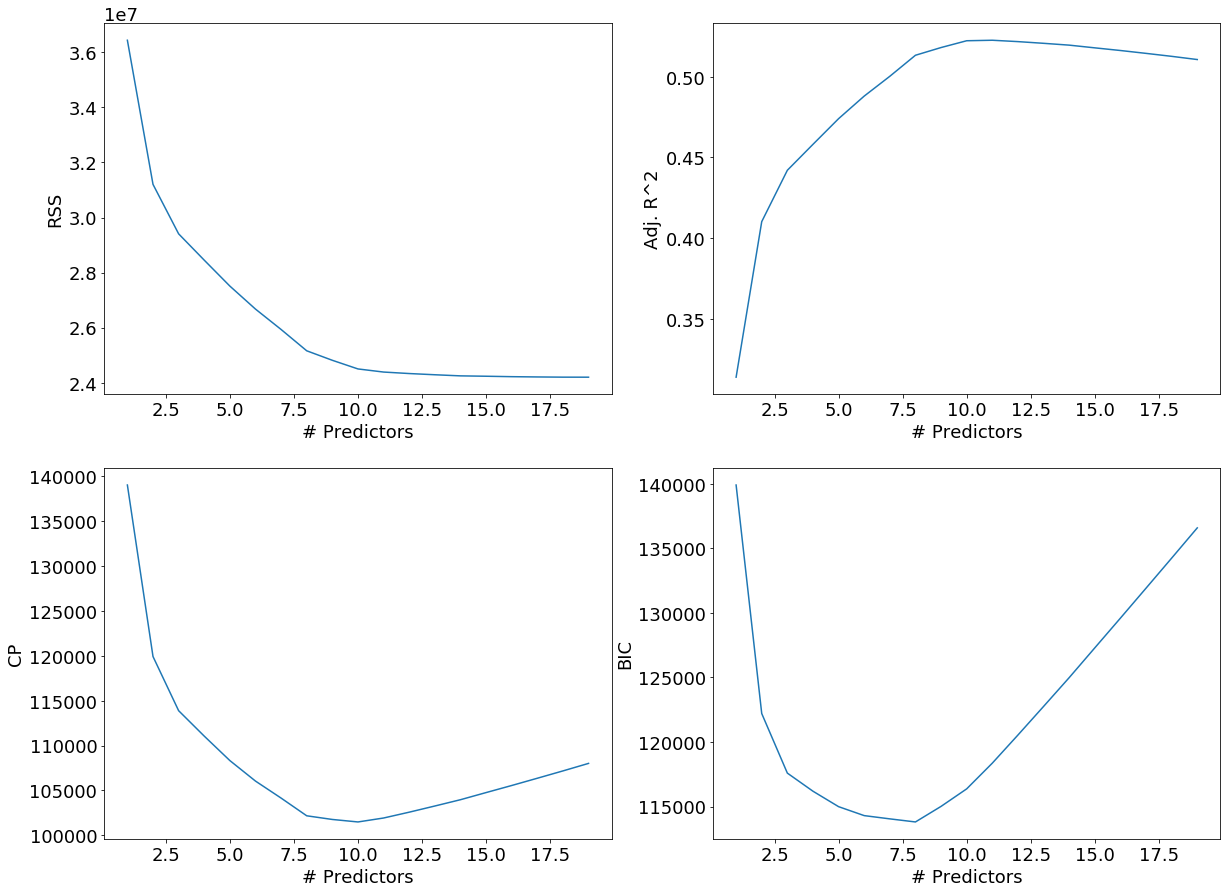

In [14]:
plt.figure(figsize = (20,15))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

plt.subplot(2, 2, 1)
plt.plot(RSS)
plt.xlabel('# Predictors')
plt.ylabel('RSS')

plt.subplot(2, 2, 2)
plt.plot(A_rsquared)
plt.xlabel('# Predictors')
plt.ylabel('Adj. R^2')

plt.subplot(2, 2, 3)
plt.plot(cp)
plt.xlabel('# Predictors')
plt.ylabel('CP')

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.xlabel('# Predictors')
plt.ylabel('BIC')

plt.show()